In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from csv import writer
from csv import reader
from scipy import stats
import datetime

# Nearest Neighbor Classification Algorithm (NN_KNN)

## Functions

In [165]:

def getDataFromCSV(filename):
   # read the CSV file
    data = pd.read_csv('boston_weather_data.csv')
    return data


def filterData(data):
    # filter the data to include April to July only
    months = [4, 5, 6, 7]
    filtered_data = data[data['Month'].isin(months)]

    # filter days that snowed
    filtered_data = filtered_data[filtered_data['Events'] != 'Snow']

    return filtered_data

def addClassificationColumn(filtered_data):
    # Add a new column called "Classification" which is 1 if it "Rained" or "Both"
    filtered_data['Classification'] = 0
    filtered_data.loc[filtered_data['Events'].isin(['Rain', 'Both']), 'Classification'] = 1

    # Reset the indexes
    filtered_data = filtered_data.reset_index(drop=True)

    return filtered_data

def normalizeData(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data, min_val, max_val

def createTestCase(minH, maxH, minG, maxG):
    #Create a test case minG
    #nTestCaseH and nTestCaseG are normalized 
    #testCaseH and testCaseG are not normalized
    nTestCaseH, nTestCaseG = np.random.uniform(size=2)
    testCaseH = (nTestCaseH * (maxH - minH)) + minH
    testCaseG = (nTestCaseG * (maxG - minG)) + minG
    return nTestCaseH, nTestCaseG, testCaseH, testCaseG

def classifyTestCase(high_dew_point, avg_temp, classification, testCaseH, testCaseG):
    #Use the Nearest Neighbor Classification to classify the test case
    # Calculate distances between test case and each data point
    distances = np.sqrt((high_dew_point - testCaseH) ** 2 + (avg_temp - testCaseG) ** 2)

    # Find the index of the closest point
    closestIdx = np.argmin(distances)

    # Get the classification of the closest point
    closestClassification = classification[closestIdx]

    return closestClassification, closestIdx



'''
PURPOSE: normalize a NumPy array (glucose and hemoglobin both will need to be normalized)
PARAMETERS: NumPy array to be normalized
RETURNS: the normalized array, the minimum value of the old array, and the maximum value of the old array.
'''
def normalizeData(array):
    #Find min
    min = np.amin(array)
    #Fin max
    max = np.amax(array)
    #Claculate the scaled values
    scaled = (array - min)/(max - min)
    #Return them
    return scaled, min, max

'''
PURPOSE: create a scatter plot of the glucose (Y) and hemoglobin (X)
        with the points graphed colored based on the classification
PARAMETERS: array of glucose, array of hemoglobins, and 
            its classification
RETURNS: nothing, only makes the graph
'''
def graphData(glucose, hemoglobin, classification):
    length = len(classification)

    # zeroGlucose and zeroHemoglobin arrays will values 
    # for patients with no CKD
    zeroGlucose = []
    zeroHemoglobin = []

    # oneGlucose and oneHemoglobin arrays will hold the values 
    # for patients with CKD
    oneGlucose = []
    oneHemoglobin = []

    for i in range(length):
        if (classification[i] == 0):
            zeroGlucose.append(glucose[i])
            zeroHemoglobin.append(hemoglobin[i])
        else:
            oneGlucose.append(glucose[i])
            oneHemoglobin.append(hemoglobin[i]) 

    plt.scatter(oneGlucose, oneHemoglobin, label="Patients with CKD")
    plt.scatter(zeroGlucose, zeroHemoglobin, label="Patients without CKD")
    plt.xlabel("Glucose levels")
    plt.ylabel("Hemoglobin levels")
    plt.legend()
    plt.title("Patients' glucose and hemoglobin levels")
    plt.show()

'''
PURPOSE:creates a random test case that falls within the
        minimum and maximum values of the training hemoglobin and
        glucose data
PARAMETERS: glucose's min and max value, hemoglobin's min and
            max value
RETURNS: normalized and not-normalized test case
'''
# High Dew Point (F)'], filtered_data['Avg Temp (F)'
def createTestCase(minH, maxH, minG, maxG):
    print("  -Generating a random test case-  ")
    #generate random test cases for hemoglobin and glucose
    testCaseH = random.randint(int(minH), int(maxH)+1)
    testCaseG = random.randint(int(minG), int(maxG)+1)

    print("High Dew Point:", testCaseH)
    print("Avg Temp:", testCaseG)

    #normalize random test cases
    newHemoglobin = (testCaseH - minH)/(maxH - minH)
    newGlucose = (testCaseG - minG)/(maxG - minG)

    return newHemoglobin, newGlucose, testCaseH, testCaseG

'''
PURPOSE:Calculates the distance from the test case to each
        point
PARAMETERS: test case's glucose and hemoglobin levels, the 
            array with glucose and hemoglobin levels from
            the patients
RETURNS: an array containing all the distances calculated
'''
def calculateDistanceArray(newGlucose, newHemoglobin, glucose, hemoglobin):
    distanceG = (newGlucose - glucose)**2
    distanceH = (newHemoglobin - hemoglobin)**2
    distanceArray = (distanceG + distanceH)*0.5
    return distanceArray 

'''
PURPOSE: Use the Nearest Neighbor Classifier to classify the 
         test case
PARAMETERS: glucose and hemoglobins data, and 
            their classifications, test case's glucose and
            hemoglobin levels (newGlucose, newHemoglobin)
RETURNS: prints test case's classification
'''
def nearestNeighborClassifier(newGlucose, newHemoglobin, glucose, hemoglobin, classification):
    print("\nNearest Neighbor Classifier:")
    #Get the distance array
    distanceArray = calculateDistanceArray(newGlucose, newHemoglobin, glucose, hemoglobin)

    #Find the point that is closest to the test case
    closest = min(distanceArray)

    #Find the index of the closest point
    closestIdx = np.where(distanceArray == closest)
    print("Closest index:", closestIdx)

    #Get the closest point's classification
    if (classification[closestIdx]):
        print("RESULT: Test case probably has CKD (class = 1)")
    else:
        print("RESULT: Test case probably does not have CKD (class = 0)")
    print("\n")

'''
PURPOSE: Graph the patients' and the test case's glucose and     
         hemoglobin levels
PARAMETERS: glucose and hemoglobins data and 
            their classifications, test case's glucose and
            hemoglobin levels (newGlucose, newHemoglobin)
RETURNS: plots a graph
'''
def graphTestCase (newGlucose, newHemoglobin, glucose, hemoglobin, classification):
    length = len(classification)

    # zeroGlucose and zeroHemoglobin arrays will hold values 
    # for patients with no CKD
    zeroGlucose = []
    zeroHemoglobin = []

    # oneGlucose and oneHemoglobin arrays will hold the values 
    # for patients with CKD
    oneGlucose = []
    oneHemoglobin = []

    for i in range(length):
        if (classification[i] == 0):
            zeroGlucose.append(glucose[i])
            zeroHemoglobin.append(hemoglobin[i])
        else:
            oneGlucose.append(glucose[i])
            oneHemoglobin.append(hemoglobin[i]) 

    plt.scatter(oneGlucose, oneHemoglobin, label="Patients with CKD")
    plt.scatter(zeroGlucose, zeroHemoglobin, label="Patients without CKD")
    plt.scatter(newGlucose, newHemoglobin, label="Test case", edgecolors = "r", color = "r")
    plt.xlabel("Glucose levels")
    plt.ylabel("Hemoglobin levels")
    plt.legend()
    plt.title("Patients' glucose and hemoglobin levels")
    plt.show()

'''
PURPOSE: Use the K-Nearest Neighbor Classifier to classify the 
         test case
PARAMETERS: glucose and hemoglobins data, and 
            their classifications, test case's glucose and
            hemoglobin levels (newGlucose, newHemoglobin)
RETURNS: prints test case's classification
'''
def kNearestNeighborClassifier(k, newGlucose, newHemoglobin, glucose, hemoglobin, classification):
    print("K-Nearest Neighbor Classifier:")
    #Get the distance array
    distanceArray = calculateDistanceArray(newGlucose, newHemoglobin, glucose, hemoglobin)

    #Get all the indices in closest order (closest to furthest)
    allClosestIndexes = np.argsort(distanceArray)

    #Get the k-closest points
    kClosestIndexes = allClosestIndexes[0:k]

    print("K-closest indexes:", kClosestIndexes)

    #Get the classification of the closest points
    kClosestClass = classification[kClosestIndexes]

    #Find the mode of the k closest points
    mode = stats.mode(kClosestClass)

    print("K-closest classifications:", kClosestClass)
    

    #Get the test's classification
    if (mode):
        print("RESULT: Test case probably has CKD (class = 1)")
    else:
        print("RESULT: Test case probably does not have CKD (class = 0)")

## Script

Data analysis and exploration. We are trying to find which variables most correlate to the chance of raining.

In [ ]:
filename = "boston_weather_data.csv"
data = getDataFromCSV(filename)

# Select only the data points with "Rain" in the "Events" column
rain_data = data[data['Events'] == 'Rain']

# One-hot encode the "Events" column
one_hot = pd.get_dummies(data['Events'])

# Combine one-hot encoded columns with original data
data = pd.concat([data, one_hot], axis=1)

# Calculate correlations with "Rain" event
corr_matrix = data.corr()['Rain'].sort_values()

# Print correlations in descending order
print(corr_matrix[::-1])

This script will run the Nearest Neighbor algorithm to train the model, generate a test point (with random values), and classify it as a raining day or not.

RESULT: Test day will probably rain (class = 1)


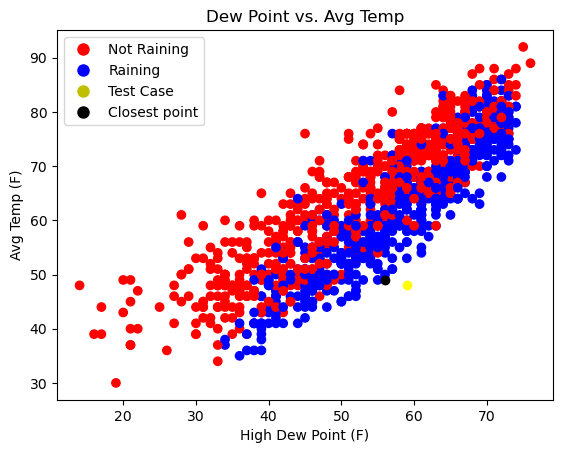

In [174]:
filename = "boston_weather_data.csv"
data = getDataFromCSV(filename)


# # drop rows containing "None" in "Events" column
# data = data.drop(index=data.loc[data['Events'] == 'None'].index)

# filter the data to include April to July only
months = [4, 5, 6, 7]
filtered_data = data[data['Month'].isin(months)]

# filter days that snowed
filtered_data = filtered_data[filtered_data['Events'] != 'Snow']

# Add a new column called "Classification" which is 1 if it "Rained" or "Both"
filtered_data['Classification'] = 0
filtered_data.loc[filtered_data['Events'].isin(['Rain', 'Both']), 'Classification'] = 1

# Reset the indexes
filtered_data = filtered_data.reset_index(drop=True)

# For testing. Comment this out later.
# filtered_data = filtered_data.iloc[:10]

#Since we found high correlation of rain with high dew point and avg temp, we are going to use them in our model
high_dew_point = filtered_data['High Dew Point (F)']
avg_temp = filtered_data['Avg Temp (F)']
classification = filtered_data['Classification'] 


#normalize the data and get min and max
scaledG, minG, maxG = normalizeData(high_dew_point)
scaledH, minH, maxH = normalizeData(avg_temp)

#Create a test case minG
#nTestCaseH and nTestCaseG are normalized 
#testCaseH and testCaseG are not normalized
nTestCaseH, nTestCaseG, testCaseH, testCaseG = createTestCase(minH, maxH, minG, maxG)

#Use the Nearest Neighbor Classification to classify the test case
# Calculate distances between test case and each data point
distances = np.sqrt((high_dew_point - testCaseH) ** 2 + (avg_temp - testCaseG) ** 2)

# Find the index of the closest point
closestIdx = np.argmin(distances)

# Get the classification of the closest point
closestClassification = classification[closestIdx]

#Get the closest point's classification
if (closestClassification == 1):
    print("RESULT: Test day will probably rain (class = 1)")
else:
    print("RESULT: Test day will probably not rain (class = 0)")

#plot non-normalized data
colors = {0: 'red', 1: 'blue'}
plt.scatter(filtered_data['High Dew Point (F)'], filtered_data['Avg Temp (F)'], c=filtered_data['Classification'].apply(lambda x: colors[x]))
plt.scatter(testCaseH, testCaseG, c='yellow', label='Test Case')
plt.scatter(filtered_data.loc[closestIdx, 'High Dew Point (F)'], filtered_data.loc[closestIdx, 'Avg Temp (F)'], c='black', label='Closest point')
plt.xlabel('High Dew Point (F)')
plt.ylabel('Avg Temp (F)')
plt.title('Dew Point vs. Avg Temp')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Not Raining', markerfacecolor='r', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Raining', markerfacecolor='b', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Test Case', markerfacecolor='y', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Closest point', markerfacecolor='black', markersize=10)]
plt.legend(handles=legend_elements)
plt.show()

# year = filtered_data['Year']
# month = filtered_data['Month']
# day = filtered_data['Day']

# high_temp = filtered_data['High Temp (F)']
# avg_temp = filtered_data['Avg Temp (F)']
# low_temp = filtered_data['Low Temp (F)']

# high_dew_point = filtered_data['High Dew Point (F)']
# avg_dew_point = filtered_data['Avg Dew Point (F)']
# low_dew_point = filtered_data['Low Dew Point (F)']

# high_humidity = filtered_data['High Humidity (%)']
# avg_humidity = filtered_data['Avg Humidity (%)']
# low_humidity = filtered_data['Low Humidity (%)']

# high_pressure = filtered_data['High Sea Level Press (in)']
# avg_pressure = filtered_data['Avg Sea Level Press (in)']
# low_pressure = filtered_data['Low Sea Level Press (in)']

# high_visibility = filtered_data['High Visibility (mi)']
# avg_visibility = filtered_data['Avg Visibility (mi)']
# low_visibility = filtered_data['Low Visibility (mi)']

# high_wind = filtered_data['High Wind (mph)']
# avg_wind = filtered_data['Avg Wind (mph)']
# high_wind_gust = filtered_data['High Wind Gust (mph)']

# snowfall = filtered_data['Snowfall (in)']
# precipitation = filtered_data['Precip (in)']
# events = filtered_data['Events']

# K-Means Clustering Classification Algorithm (KMC)

In [170]:
# *******************************************************************
# FUNCTIONS
# *******************************************************************
'''
PURPOSE: opens a file 'ckd.csv' and gets glucose and hemoglobin levels, also gets their classifications 
PARAMETERS: none
RETURNS: glucose and hemoglobin levels, and their classifications 
'''
def openckdfile():
    glucose, hemoglobin, classification = np.loadtxt('ckd.csv', delimiter=',', skiprows=1, unpack=True)
    return glucose[0:], hemoglobin[0:], classification[0:]

'''
PURPOSE: normalize a NumPy array (glucose and hemoglobin both will need to be normalized), calculating min and max values
PARAMETERS: NumPy array to be normalized
RETURNS: the normalized array, the minimum value of the old array, and the maximum value of the old array.
'''
def normalizeData(array):
    #Find min
    min = np.amin(array)
    #Fin max
    max = np.amax(array)
    #Claculate the scaled values
    scaled = (array - min)/(max - min)
    #Return them
    return scaled, min, max

'''
PURPOSE: helper function for calculateDistArr. Calculates the distance between gs and hs and provided centroids. 
PARAMETERS: which centroid (k), glucose array, hemoglobin array, and centroid arrays
RETURNS: calculated distance
'''
def calculateDistForK(k, gs, hs, centroids):
    #Create the array to store the calculated distances
    calcDist = np.zeros(len(gs))

    #Get the kth point 
    gCent = centroids[k, 0]
    hCent = centroids[k,1]

    #Calculate the distance from centroid to 
    # kth glucose and hemoglobin points
    distanceG = (gs - gCent)**2
    distanceH = (hs - hCent)**2
    calcDist = (distanceG + distanceH)*0.5

    return calcDist

'''
PURPOSE: calculate the distances between points and centroids
PARAMETERS: number of centroids (K), glucose array, hemoglobin array, and centroid arrays
RETURNS: array with distances from glucose and hemoglobin points to
centroid points
'''
def calculateDistArr(K, gs, hs, centroids):

    #Initial distance array has 0 rows
    distanceArr = np.zeros((0, len(gs)))

    for k in range(K):
        #get a new row for k using a helper function
        newRow = calculateDistForK(k, gs, hs, centroids)

        #add it to distance array, this is the k-th centroid
        #distances
        distanceArr = np.vstack([distanceArr, newRow])

    return distanceArr

'''
PURPOSE: uses the distance array to find the centroid closest to
each point, assigning it a classification (from 0 to K)
PARAMETERS: array with distances for each point, number of centroids (K), number of points (length of data taken from file)
RETURNS: array with assignments for all points
'''
def calculateAssignment(distanceArr, K, dataLength):
    # For each point
    assignment = np.zeros(dataLength)
    dist = np.zeros(K)
    for i in range(dataLength):
        for k in range(K):
            #Distance from point i from centroid k is 
            # distanceArr[k,i]
            dist[k] = distanceArr[k,i]

        #Find the index of the closest centroid for this point
        #This is its classification (from 0 to K)
        assignment[i] = np.argmin(dist)
    
    return assignment 

'''
PURPOSE: Updates the location of each centroid by finding the mean of each feature of the observations (data points) currently assigned to that centroid
PARAMETERS: number of centroids (K), glucose array, hemoglobin array, and centroids arrays
RETURNS: updated centroid array
'''
def updateCentroids(K, gs, hs, assignment, centroids):
    #Create newCentroids that will store the updated values
    newCentroids = np.zeros((K, 2)) 

    for k in range(K):
        #if there is any assignment == k
        if((assignment == k).any()):
            newCentroids[k,0] = float(np.mean(gs[assignment==k]))
            newCentroids[k,1] = float(np.mean(hs[assignment==k]))
        # print("Centroid",k,"location is now", newCentroids[k,0], newCentroids[k,1])
    return newCentroids

'''
PURPOSE: "Denormalizes" the centroids' data. Transform values
ranging from 0 to 1 into values ranging from max and min (of
glucose and hemoglobins). 
PARAMETERS: denormalized centroids array, denormalized hemoglobin
array and K
RETURNS: denormalized centroids array
'''
def denormalize(centroids, h, g, K):
    #Find min
    minH = np.amin(h)
    minG = np.amin(g)
    #Fin max
    maxH = np.amax(h)
    maxG = np.amax(g)
    #Calculate the denormalized values
    #dCentroids = np.zeros((2, K))
    dCentroids = centroids
    for k in range(K):
        dCentroids[k,0] = (centroids[k][0] * (maxG - minG)) + minG
        dCentroids[k,1] = (centroids[k][1] * (maxH - minH)) + minH
    
    #Return
    return dCentroids

'''
PURPOSE: Graphs hemoglobin and glucose levels with calculated centroids
PARAMETERS: glucose array, hemoglobin array, their calculated assignments, and centroids arrays
RETURNS: nothing
'''
def graphingKMeans(glucose, hemoglobin, assignment, centroids, K):
    plt.figure()

    #Converting to int
    assignment = assignment.astype(int)

    for i in range(assignment.max()+1):
        rcolor = np.random.rand(3,)
        plt.plot(hemoglobin[assignment==i],glucose[assignment==i], ".", label = "Class " + str(i), color = rcolor)
        plt.plot(centroids[i, 1], centroids[i, 0], "D", label = "Centroid " + str(i), color = rcolor)
        
    plt.xlabel("Hemoglobin")
    plt.ylabel("Glucose")
    plt.legend()
    plt.show()

Generated centroids: [[0.60643879 0.87907832]
 [0.46281752 0.00355898]]
5 iterations.
Centroid features (locations): 
Centroid 0 63.14701803051319 71.3994452149793
Centroid 1 43.48207171314745 51.66932270916335
KMC Classifications:
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


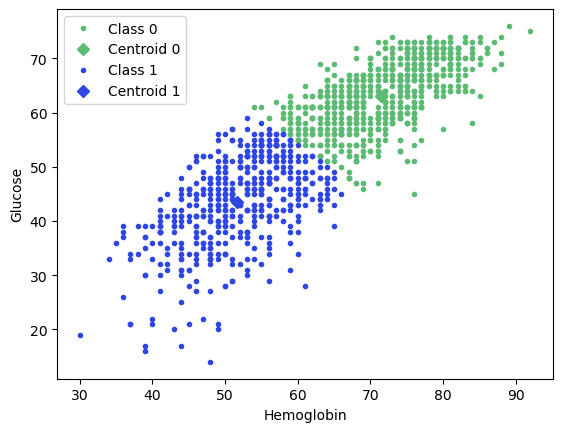

In [171]:
# Select K random centroid points. These should fall within the range of the feature sets.
K = 2

#Generate a 2D array for centroids
#column 0 = glucose
#column 1 hemoglobin
centroids = np.random.rand(K,2) 

print("Generated centroids:", centroids)

data = getDataFromCSV(filename) 

# filter the data to include April to July only
months = [4, 5, 6, 7]
filtered_data = data[data['Month'].isin(months)]

# filter days that snowed
filtered_data = filtered_data[filtered_data['Events'] != 'Snow']

# Add a new column called "Classification" which is 1 if it "Rained" or "Both"
filtered_data['Classification'] = 0
filtered_data.loc[filtered_data['Events'].isin(['Rain', 'Both']), 'Classification'] = 1

# Reset the indexes
filtered_data = filtered_data.reset_index(drop=True)

# For testing. Comment this out later.
# filtered_data = filtered_data.iloc[:10]

#Since we found high correlation of rain with high dew point and avg temp, we are going to use them in our model
g = filtered_data['High Dew Point (F)']
h = filtered_data['Avg Temp (F)']
c = filtered_data['Classification'] 

#g,h,c = openckdfile()

#The number of points will be the size of any g, h, or c
dataLength = len(g)

#Normalize arrays
gs, gmin, gmax = normalizeData(g)
hs, smin, smax = normalizeData(h)

loop = 1
iterations = 0
while(loop):
    #Count how many iterations are needed
    iterations+= 1

    #Calculate distances from points to centroids
    distanceArr = calculateDistArr(K, gs, hs, centroids)

    #Find the assignment (from 0 to K) for each point
    assignment = calculateAssignment(distanceArr, K, dataLength)

    #Update centroids
    newCentroids = updateCentroids(K, gs, hs, assignment, centroids)

    #If centroids did not change, stop the loop
    if ((newCentroids == centroids).all()):
        loop = 0

    centroids = newCentroids

#Denormalize the centroids
dCentroids = denormalize(centroids, h, g, K)

print(iterations, "iterations.")
print("Centroid features (locations): ")
for i in range (K):
    print("Centroid", i, dCentroids[i][0], dCentroids[i][1])
    
# print("Original classifications", c[35:55])
print("KMC Classifications:")
for i in range(dataLength):
    print(assignment[i])


plt.figure()

#Converting to int
assignment = assignment.astype(int)

for i in range(assignment.max()+1):
    rcolor = np.random.rand(3,)
    plt.plot(h[assignment==i],g[assignment==i], ".", label = "Class " + str(i), color = rcolor)
    plt.plot(centroids[i, 1], centroids[i, 0], "D", label = "Centroid " + str(i), color = rcolor)
    
plt.xlabel("Hemoglobin")
plt.ylabel("Glucose")
plt.legend()
plt.show()